# Assignment 3 - Gaussian Process and Boosting

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import importlib
from Utils.Funcs import *

## Question 1 (Gaussian Process)

In [2]:
X_train = pd.read_csv("Data/gaussian_process/X_train.csv", header = None).values
X_test = pd.read_csv("Data/gaussian_process/X_test.csv", header = None).values
Y_train = pd.read_csv("Data/gaussian_process/y_train.csv", header = None).values
Y_test = pd.read_csv("Data/gaussian_process/y_test.csv", header = None).values

for i in [Y_train, Y_test]:
    i = i.reshape((i.shape[0], ))

In [3]:
indx = [5, 7, 9, 11, 13, 15]
sig = list(np.arange(0.1, 1.1, 0.1).round(1))
comparison_matrix = pd.DataFrame(index = indx, columns = sig)

In [32]:
for index in indx:
    for col in sig:
        p, r = gauss_predict(x_train = X_train, x_test = X_test, sig = col, b = index, y_train = Y_train, y_test= Y_test)
        comparison_matrix.loc[index, col] = r

In [33]:
comparison_matrix

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
5,1.96628,1.93314,1.92342,1.9222,1.92477,1.92921,1.93463,1.94058,1.94682,1.95321
7,1.92016,1.90488,1.90808,1.9159,1.9248,1.9337,1.94225,1.95038,1.95809,1.96544
9,1.89765,1.90252,1.91765,1.93251,1.9457,1.95723,1.9674,1.97649,1.98474,1.99234
11,1.89051,1.91498,1.93885,1.95794,1.97322,1.98576,1.99638,2.0056,2.01384,2.02134
13,1.89585,1.93559,1.9646,1.9855,2.00131,2.01388,2.02431,2.03331,2.04132,2.04864
15,1.9096,1.95955,1.9908,2.01192,2.02737,2.03947,2.04946,2.0581,2.06585,2.07298


Above we can see the RMSE for different combinations of $ b $ and $ \sigma^2 $. he best combination seems to be $ b =11 \ \& \ \sigma^2 = 0.1 $ whcih achieves an RMSE of 1.890. This is somewhat better than the approximately 2.2 we scored using our best regularized polynomial model in Assignment 1.

In [10]:
X_train_2 = X_train[:,3].reshape(X_train.shape[0], 1)

p, r = gauss_predict(x_train = X_train_2, x_test = X_train_2, sig = 2, b = 5, y_train = Y_train, y_test= Y_train)

In [33]:
combined = np.hstack((p, X_train_2, Y_train))
df_gauss = pd.DataFrame(combined)
df_gauss.sort_values(by = 1, inplace = True)

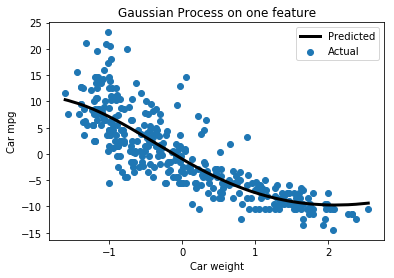

In [40]:
plt.scatter(df_gauss[1], df_gauss[2], label = "Actual")
plt.plot(df_gauss[1], df_gauss[0], linewidth = 3, color = "black", label = "Predicted")
plt.legend()
plt.xlabel("Car weight")
plt.ylabel("Car mpg")
plt.title("Gaussian Process on one feature")
plt.show()

## Question 2 (Boosting)